<a href="https://colab.research.google.com/github/sreeja2208/assignments/blob/main/Lab11Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Project: Covid Data Analysis with Regression

In this project, we will use the concepts of regression we have learnt to predict early Covid-19 cases. We shall use linear regression, polynomial regression to obtain a reasonably good estimate of the future cases. Try experimenting with hyperparameters to obtain better results.

## Data Analysis

### 1. **Load the data** into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import scipy.integrate

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,8

import copy 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_orig=pd.read_csv("https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv")
print(df_orig.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


### 2. Create a new dataframe which counts the cumulative total number of cases, the cumulative total number of deaths, and also  cumulative total number of recoveries for each date.

In [3]:
df=copy.deepcopy(df_orig)
df.drop('Last Update',inplace=True,axis=1)
date_lst=df.ObservationDate.unique()
date_dict={}
for i in range(len(date_lst)):
  df_temp=df.loc[df['ObservationDate']==date_lst[i]]
  date_dict[date_lst[i]]=df_temp

In [4]:
date_tot_tup_dict={}
for date,df in date_dict.items():
  tup_temp=(df['Confirmed'].sum(),df['Deaths'].sum(),df['Recovered'].sum())
  date_tot_tup_dict[date]=tup_temp

In [5]:
df_date_tots=pd.DataFrame(date_tot_tup_dict)
df_date_tots=df_date_tots.transpose()
df_date_tots.columns=['Confirmed','Deaths','Recovered']
print(df_date_tots)

            Confirmed   Deaths  Recovered
01/22/2020      555.0     17.0       28.0
01/23/2020      653.0     18.0       30.0
01/24/2020      941.0     26.0       36.0
01/25/2020     1438.0     42.0       39.0
01/26/2020     2118.0     56.0       52.0
...               ...      ...        ...
03/27/2020   593291.0  27198.0   130915.0
03/28/2020   660706.0  30652.0   139415.0
03/29/2020   720117.0  33925.0   149082.0
03/30/2020   782365.0  37582.0   164566.0
03/31/2020   857487.0  42107.0   178034.0

[70 rows x 3 columns]


### 3. **Plot** the total number of cases per day over time and summarize findings

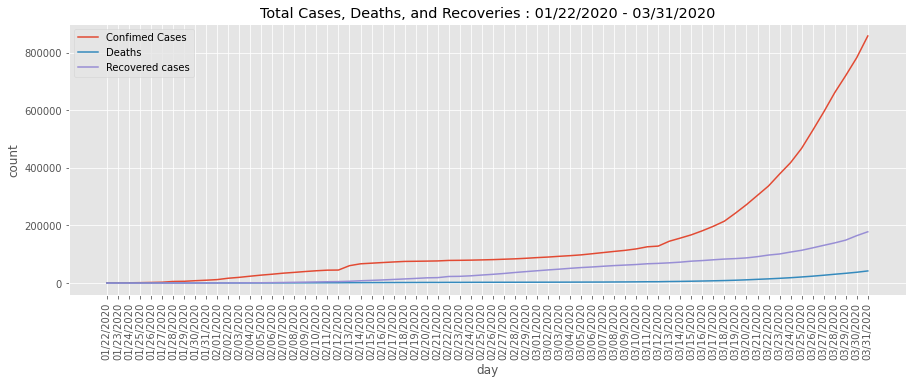

In [6]:
plt.figure(figsize=[15,5])
plt.plot(df_date_tots['Confirmed'],label='Confimed Cases')
plt.plot(df_date_tots['Deaths'],label='Deaths')
plt.plot(df_date_tots['Recovered'],label='Recovered cases')
plt.legend()
plt.xlabel('day')
plt.ylabel('count')
plt.xticks(rotation=90)
start_date=str(date_lst[0])
fin_date=str(date_lst[len(date_lst)-1])
plt.title("Total Cases, Deaths, and Recoveries : " + start_date + " - " + fin_date);

All of the three curves seem to be exponential (start of logistic curve). The confirmed cases was obviously higher than the deaths and recovered cases. The rate of the the recovered cases seems to be higher than that of the death curve.

### 4. Create a new column in the dataframe called **“closed cases”**

In [7]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']

### 5. Create a new column in the dataframe called “**active cases**”

In [8]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']

### 6. Create one **plot** showing the trend of number of active cases and closed cases 

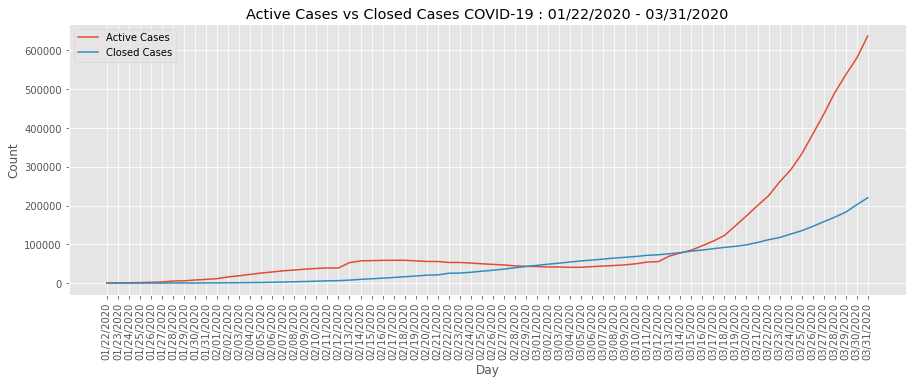

In [9]:
plt.figure(figsize=[15,5])
plt.plot(df_date_tots['Active Cases'], label = "Active Cases")
plt.plot(df_date_tots['Closed Cases'], label = "Closed Cases")
plt.legend()
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
start_date=str(date_lst[0])
fin_date=str(date_lst[len(date_lst)-1])
plt.title("Active Cases vs Closed Cases COVID-19 : " + start_date + " - " + fin_date);

The number of active cases is higher than the number of closed cases as of yet.

### 7. Growth Factor

In [10]:
growth_len_lst=len(date_lst)-1
confirmed_lst=df_date_tots['Confirmed']
death_lst=df_date_tots['Deaths']
recovered_lst=df_date_tots['Recovered']
confGF_lst=[]
deathsGF_lst=[]
recovGF_lst=[]
for i in range(growth_len_lst):
  confirmedGF=confirmed_lst[i+1]/confirmed_lst[i]
  confGF_lst.append(confirmedGF)
  deathsGF=death_lst[i+1]/death_lst[i]
  deathsGF_lst.append(deathsGF)
  recoveredGF=recovered_lst[i+1]/recovered_lst[i]
  recovGF_lst.append(recoveredGF)

Text(0.5, 1.0, 'Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : 01/22/2020 - 03/31/2020')

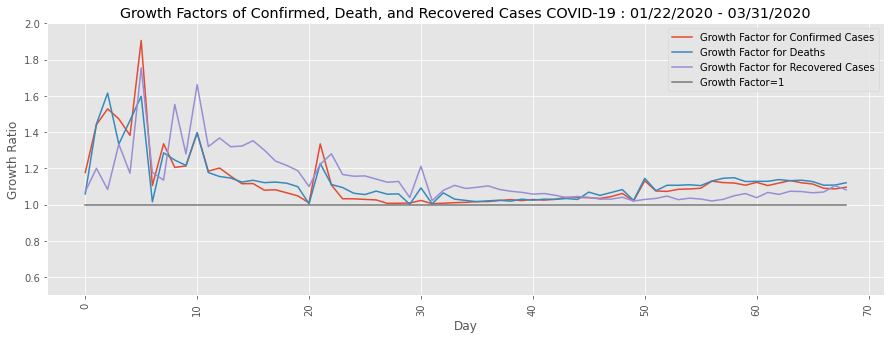

In [12]:
plt.figure(figsize=[15,5])
plt.plot(confGF_lst,label='Growth Factor for Confirmed Cases')
plt.plot(deathsGF_lst,label='Growth Factor for Deaths')
plt.plot(recovGF_lst,label='Growth Factor for Recovered Cases')
x=[]
for i in range(growth_len_lst):
  x.append(1)
plt.plot(x,label='Growth Factor=1')  
plt.legend()
plt.xlabel('Day')
plt.ylabel('Growth Ratio')
plt.ylim(.5,2)
plt.xticks(rotation=90)
start_date = str(date_lst[0])
fin_date   = str(date_lst[len(date_lst) -1])
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases COVID-19 : " +start_date +" - " +fin_date)

# **Part 2 - Prediction Using Linear Regression**

#### To make our data to be compatible with *sklearn* format, create a new column called “Days since” which tracks the number of days since the initial date.

In [13]:
days_since_lst=[]
for i in range(len(date_lst)):
  days_since_lst.append(i)
df_date_tots['Days Since:']=days_since_lst
df_date_tots = df_date_tots[["Days Since:", "Confirmed", "Deaths", "Recovered", "Active Cases", "Closed Cases"]]

### 8. Take the earliest 85% of the dates as **train** and the rest as **test**

In [14]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

x=np.array(df_date_tots['Days Since:']).reshape(-1,1)
y=np.array(df_date_tots['Confirmed'])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=False)

### 9. We can try different regression and regularizations we have seen before

#### 9.1 Linear Regression

In [16]:
lin_model=LinearRegression(fit_intercept=False)
lin_model.fit(x_train,y_train)
test_lin_pred=lin_model.predict(x_test)
lin_pred=lin_model.predict(x)

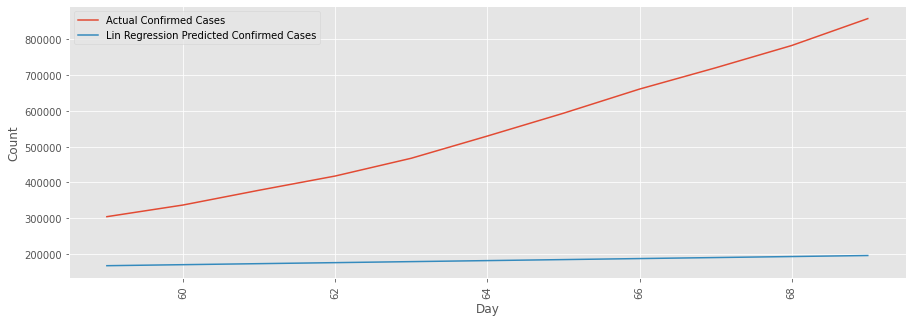

MAE: 181791.423099402
MSE: 33128805402.917187


In [18]:
plt.figure(figsize=[15,5])
plt.plot(x_test,y_test,label='Actual Confirmed Cases')
plt.plot(x_test,test_lin_pred,label='Lin Regression Predicted Confirmed Cases')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print('MAE:',mean_absolute_error(test_lin_pred,x_test))
print('MSE:',mean_squared_error(test_lin_pred,x_test))

#### Polynomial Regression


Task: Read about Polynomial Regression. 

References:
  [Link 1](https://https://www.analyticsvidhya.com/blog/2021/07/all-you-need-to-know-about-polynomial-regression/)
  [Link 2](https://https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)


In [21]:
poly=PolynomialFeatures(degree=5)
poly_x_train=poly.fit_transform(x_train)
poly_x_test=poly.fit_transform(x_test)
poly_x=poly.fit_transform(x)

In [23]:
linear_model=LinearRegression(fit_intercept=False)
linear_model.fit(poly_x_train,y_train)
test_poly_pred=linear_model.predict(poly_x_test)
poly_pred=linear_model.predict(poly_x)

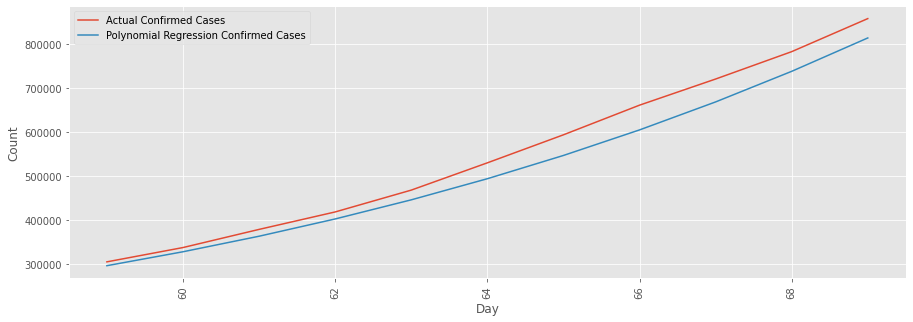

MAE: 31989.752678661967
MSE: 1314905592.3565953


In [25]:
plt.figure(figsize=[15,5])
plt.plot(x_test,y_test,label='Actual Confirmed Cases')
plt.plot(x_test,test_poly_pred,label='Polynomial Regression Confirmed Cases')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

print('MAE:', mean_absolute_error(test_poly_pred, y_test))
print('MSE:',mean_squared_error(test_poly_pred, y_test))

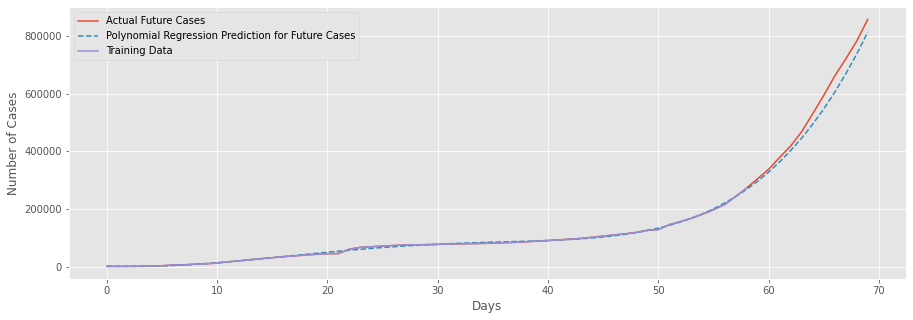

In [27]:
plt.figure(figsize=[15,5])
plt.plot(x,y,label='Actual Future Cases')
plt.plot(x,poly_pred,label='Polynomial Regression Prediction for Future Cases',linestyle='dashed')
plt.plot(x_train,y_train,label='Training Data')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()